In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
winter = pd.read_csv('winter_merged_stops.tsv.gz', sep='\t')

In [ ]:
summer = pd.read_csv('summer_merged_stops.tsv.gz', sep='\t')

## Check the number of nan in 'ons'

In [28]:
winter.ons.isna().sum()

7

In [29]:
summer.ons.isna().sum()

13

In [148]:
winter.ons.sum()

11340318.0

In [147]:
summer.ons.sum()

15270347.0

In [149]:
winter.ons.sum()-summer.ons.sum()

-3930029.0

# Describe for winter and summer data

In [4]:
winter.describe()

,apc_txn_dt_diff,orca_txn_dt_diff,day_of_week,trip_id,stop_id,vehicle_id,rte,stop_seq,door_open_sec,dwell_sec,ons,offs,load,orca_total,orca_adult,orca_disabled,orca_senior,orca_youth,orca_lowincome,orca_uw
count,1.174010e+07,2.587375e+06,1.174010e+07,1.174010e+07,1.174010e+07,1.174010e+07,1.174010e+07,1.174010e+07,1.173961e+07,1.173999e+07,1.174009e+07,1.174009e+07,1.174010e+07,1.174010e+07,1.174010e+07,1.174010e+07,1.174010e+07,1.174010e+07,1.174010e+07,1.174010e+07
mean,-6.047650e-06,-2.448427e-03,2.673507e+00,3.967599e+07,3.677711e+04,6.211315e+03,1.806299e+02,2.080232e+01,7.381142e+00,1.231576e+01,9.659480e-01,9.654297e-01,1.040795e+01,5.471245e-01,4.256843e-01,2.809491e-02,2.334316e-02,3.621009e-02,3.379205e-02,7.201337e-02
std,2.459190e-03,4.958494e-02,1.807693e+00,1.981131e+06,2.714361e+04,1.962073e+03,2.033929e+02,1.577818e+01,1.622095e+01,2.492202e+01,2.501886e+00,2.476997e+00,1.112420e+01,1.771945e+00,1.551081e+00,1.911640e-01,1.731964e-01,3.621084e-01,2.074379e-01,5.639244e-01
min,-1.000000e+00,-1.000000e+00,0.000000e+00,3.474582e+07,1.850000e+02,1.100000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+00,3.917502e+07,1.135200e+04,4.366000e+03,3.600000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,3.000000e+00,4.056987e+07,3.122000e+04,7.004000e+03,1.070000e+02,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,4.000000e+00,4.068534e+07,6.225400e+04,8.044000e+03,2.450000e+02,3.000000e+01,1.000000e+01,1.700000e+01,1.000000e+00,1.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.000000e+00,2.000000e+00,6.000000e+00,4.270335e+07,9.976000e+04,9.822000e+03,6.760000e+02,9.800000e+01,1.967000e+03,2.000000e+03,1.450000e+02,1.450000e+02,1.360000e+02,3.150000e+02,2.960000e+02,2.400000e+01,2.800000e+01,7.000000e+01,3.400000e+01,1.470000e+02


In [5]:
summer.describe()

,apc_txn_dt_diff,orca_txn_dt_diff,day_of_week,trip_id,stop_id,vehicle_id,rte,stop_seq,door_open_sec,dwell_sec,ons,offs,load,orca_total,orca_adult,orca_disabled,orca_senior,orca_youth,orca_lowincome,orca_uw
count,8.370816e+06,3.144462e+06,8.370816e+06,8.370816e+06,8.370816e+06,8.370816e+06,8.370816e+06,8.370816e+06,8.370084e+06,8.370668e+06,8.370803e+06,8.370806e+06,8.370816e+06,8.370816e+06,8.370816e+06,8.370816e+06,8.370816e+06,8.370816e+06,8.370816e+06,8.370816e+06
mean,-5.375820e-06,-2.144405e-03,2.478649e+00,4.006472e+07,3.269133e+04,6.397829e+03,2.029431e+02,1.892373e+01,1.504782e+01,2.464494e+01,1.824239e+00,1.811448e+00,1.322211e+01,8.743479e-01,6.904900e-01,4.835192e-02,4.240566e-02,3.520123e-02,5.789901e-02,5.378532e-02
std,2.318575e-03,4.625805e-02,1.792908e+00,2.395499e+06,2.788060e+04,1.872141e+03,2.296388e+02,1.499606e+01,2.197069e+01,3.071187e+01,3.130691e+00,3.078939e+00,1.232403e+01,2.087398e+00,1.876777e+00,2.448651e-01,2.314614e-01,2.324855e-01,2.679686e-01,3.541961e-01
min,-1.000000e+00,-1.000000e+00,0.000000e+00,3.474582e+07,2.500000e+02,1.104000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+00,3.917124e+07,7.810000e+03,4.408000e+03,3.300000e+01,7.000000e+00,7.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,2.000000e+00,4.042131e+07,2.669000e+04,7.005000e+03,1.070000e+02,1.600000e+01,1.000000e+01,1.700000e+01,1.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,4.000000e+00,4.198106e+07,5.971600e+04,8.063000e+03,2.570000e+02,2.700000e+01,1.700000e+01,2.800000e+01,2.000000e+00,2.000000e+00,1.800000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.000000e+00,0.000000e+00,6.000000e+00,4.486936e+07,9.976000e+04,9.822000e+03,6.760000e+02,9.800000e+01,1.981000e+03,1.989000e+03,1.450000e+02,1.480000e+02,1.320000e+02,3.160000e+02,2.530000e+02,2.200000e+01,2.200000e+01,3.600000e+01,2.700000e+01,5.800000e+01


# Normalized counts of trip IDs

In [115]:
winter.rte.value_counts(normalize=True, sort=True)

62     0.034352
7      0.028373
36     0.028042
245    0.025562
675    0.024389
50     0.023700
107    0.023202
45     0.022767
48     0.021012
8      0.020842
5      0.020730
40     0.019858
271    0.019291
674    0.018600
240    0.018138
2      0.018019
3      0.017932
44     0.017695
124    0.017298
132    0.017073
676    0.016446
70     0.016165
671    0.015684
673    0.015313
221    0.014299
131    0.013919
24     0.013054
234    0.012910
49     0.012793
26     0.012530
21     0.012345
226    0.012161
12     0.010973
545    0.009833
348    0.009646
28     0.009622
235    0.009516
65     0.008997
14     0.008846
33     0.008698
10     0.008666
11     0.008448
1      0.008430
180    0.008288
672    0.007651
522    0.007633
248    0.007435
4      0.007418
331    0.007320
372    0.007280
345    0.007147
75     0.006785
13     0.006751
269    0.006720
255    0.006703
238    0.006703
106    0.006204
169    0.006190
148    0.006113
550    0.006046
128    0.005968
241    0.005590
249    0

In [17]:
summer.rte.value_counts(normalize=True, sort=True)

675    0.036309
7      0.034366
62     0.032213
36     0.028793
674    0.028198
8      0.025865
45     0.024414
671    0.023385
40     0.023042
673    0.022421
70     0.020216
2      0.020022
5      0.019174
3      0.019139
245    0.017908
676    0.017696
49     0.017343
271    0.016004
50     0.014896
545    0.014442
107    0.014156
131    0.014122
255    0.013583
132    0.013225
48     0.012676
124    0.012655
550    0.011803
240    0.011679
12     0.011573
4      0.011547
26     0.011330
522    0.011255
150    0.011095
21     0.011047
10     0.010807
180    0.010667
11     0.010540
28     0.010144
14     0.009654
672    0.009321
1      0.008768
24     0.008570
221    0.008263
44     0.008143
226    0.007968
13     0.007943
106    0.007869
169    0.007615
120    0.007606
33     0.007248
234    0.007142
41     0.006861
348    0.006851
372    0.006764
60     0.006649
101    0.006404
65     0.006398
235    0.006362
542    0.006015
248    0.006006
269    0.005994
554    0.005693
128    0

# Normalized trip counts by 'rte'

In [23]:
winter.rte.value_counts(normalize=True).sort_index()

1      0.008430
2      0.018019
3      0.017932
4      0.007418
5      0.020730
7      0.028373
8      0.020842
9      0.000675
10     0.008666
11     0.008448
12     0.010973
13     0.006751
14     0.008846
15     0.000321
17     0.000347
18     0.000349
19     0.000611
21     0.012345
22     0.001467
24     0.013054
26     0.012530
27     0.005221
28     0.009622
29     0.001880
31     0.002612
32     0.003485
33     0.008698
36     0.028042
37     0.000762
40     0.019858
41     0.004774
43     0.002766
44     0.017695
45     0.022767
47     0.001952
48     0.021012
49     0.012793
50     0.023700
55     0.000432
56     0.000238
57     0.000210
60     0.004367
62     0.034352
63     0.000522
64     0.002042
65     0.008997
67     0.005235
70     0.016165
71     0.001429
73     0.001503
74     0.001056
75     0.006785
76     0.003049
77     0.000527
78     0.000262
101    0.002129
102    0.000742
105    0.002736
106    0.006204
107    0.023202
111    0.003050
113    0.000192
114    0

In [145]:
summer.rte.value_counts(normalize=True).sort_index()

1      0.008768
2      0.020022
3      0.019139
4      0.011547
5      0.019174
7      0.034366
8      0.025865
9      0.000792
10     0.010807
11     0.010540
12     0.011573
13     0.007943
14     0.009654
15     0.000584
17     0.000475
18     0.000353
19     0.000748
21     0.011047
22     0.000704
24     0.008570
26     0.011330
27     0.004990
28     0.010144
29     0.001982
31     0.001591
32     0.002848
33     0.007248
36     0.028793
37     0.000355
40     0.023042
41     0.006861
43     0.000912
44     0.008143
45     0.024414
47     0.002260
48     0.012676
49     0.017343
50     0.014896
55     0.000509
56     0.000376
57     0.000407
60     0.006649
62     0.032213
63     0.001278
64     0.002143
65     0.006398
67     0.004967
70     0.020216
71     0.001273
73     0.001315
74     0.001407
75     0.005020
76     0.003287
77     0.000775
78     0.000227
101    0.006404
102    0.001546
105    0.002007
106    0.007869
107    0.014156
111    0.001690
113    0.000171
114    0

# List the routes, and identify if the same number of routes are in each dataset

In [32]:
np.sort(winter.rte.unique())

array([  1,   2,   3,   4,   5,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  17,  18,  19,  21,  22,  24,  26,  27,  28,  29,  31,  32,
        33,  36,  37,  40,  41,  43,  44,  45,  47,  48,  49,  50,  55,
        56,  57,  60,  62,  63,  64,  65,  67,  70,  71,  73,  74,  75,
        76,  77,  78, 101, 102, 105, 106, 107, 111, 113, 114, 116, 118,
       119, 120, 121, 122, 123, 124, 125, 128, 131, 132, 143, 148, 150,
       153, 154, 156, 157, 158, 159, 164, 166, 167, 168, 169, 177, 178,
       179, 180, 181, 182, 183, 186, 187, 190, 192, 193, 197, 200, 201,
       204, 208, 212, 214, 216, 217, 218, 219, 221, 224, 226, 232, 234,
       235, 236, 237, 238, 240, 241, 243, 244, 245, 246, 248, 249, 252,
       255, 257, 268, 269, 271, 277, 301, 303, 304, 308, 309, 311, 312,
       316, 330, 331, 342, 345, 346, 347, 348, 355, 372, 373, 522, 540,
       541, 542, 545, 550, 554, 555, 556, 671, 672, 673, 674, 675, 676],
      dtype=int64)

In [33]:
np.sort(summer.rte.unique())

array([  1,   2,   3,   4,   5,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  17,  18,  19,  21,  22,  24,  26,  27,  28,  29,  31,  32,
        33,  36,  37,  40,  41,  43,  44,  45,  47,  48,  49,  50,  55,
        56,  57,  60,  62,  63,  64,  65,  67,  70,  71,  73,  74,  75,
        76,  77,  78, 101, 102, 105, 106, 107, 111, 113, 114, 116, 118,
       119, 120, 121, 122, 123, 124, 125, 128, 131, 132, 143, 148, 150,
       153, 154, 156, 157, 158, 159, 164, 166, 167, 168, 169, 177, 178,
       179, 180, 181, 182, 183, 186, 187, 190, 192, 193, 197, 200, 208,
       212, 214, 216, 217, 218, 219, 221, 226, 232, 234, 235, 236, 237,
       238, 240, 241, 243, 244, 245, 246, 248, 249, 252, 255, 257, 268,
       269, 271, 277, 301, 303, 304, 308, 309, 311, 312, 316, 330, 331,
       342, 345, 346, 347, 348, 355, 372, 373, 522, 541, 542, 545, 550,
       554, 555, 556, 671, 672, 673, 674, 675, 676], dtype=int64)

In [39]:
winter.rte.nunique()

169

In [40]:
summer.rte.nunique()

165

## Identify the routes in Winter that are not in Summer

In [41]:
list(set(winter.rte.unique()) - set(summer.rte.unique()))

[224, 201, 204, 540]

In [43]:
#Verify that there are no routes in summer that are not in winter... should be 0...
list(set(summer.rte.unique()) - set(winter.rte.unique()))

[]

In [ ]:
rte_224 = winter.loc[winter['rte'] == 224, 'ons'].sum()
rte_201 = winter.loc[winter['rte'] == 201, 'ons'].sum()
rte_204 = winter.loc[winter['rte'] == 204, 'ons'].sum()
rte_540 = winter.loc[winter['rte'] == 540, 'ons'].sum()

In [150]:
(rte_224+rte_201+rte_204+rte_540)

21815.0

In [129]:
# Percentage of ons these routes contribute to
(rte_224+rte_201+rte_204+rte_540)/winter.ons.sum()

0.0019236673962758364

# Aggrigating by route:
Aggrigating and Group By [link](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [63]:
w_ons = winter.ons.sum()
w_orca = winter.orca_total.sum()

In [64]:
s_ons = summer.ons.sum()
s_orca = summer.orca_total.sum()

In [91]:
winter_group = winter.groupby('rte', as_index=False)['ons', 'orca_total'].sum()

winter_group.head()

,rte,ons,orca_total
0,1,90311.0,62955.0
1,2,214807.0,149146.0
2,3,295765.0,190833.0
3,4,96850.0,67146.0
4,5,199272.0,140058.0


In [93]:
summer_group = summer.groupby('rte', as_index=False)['ons', 'orca_total'].sum()

summer_group.head()

,rte,ons,orca_total
0,1,131330.0,76065.0
1,2,312765.0,188628.0
2,3,339083.0,191196.0
3,4,190588.0,109466.0
4,5,251249.0,159607.0


In [135]:
df = winter_group.merge(summer_group, on='rte', how='left')
df.head()
          

,rte,ons_x,orca_total_x,ons_y,orca_total_y,ons_percentage,orca_percentage
0,1,90311.0,62955.0,131330.0,76065.0,0.011581,0.011842
1,2,214807.0,149146.0,312765.0,188628.0,0.027580,0.029366
2,3,295765.0,190833.0,339083.0,191196.0,0.029901,0.029766
3,4,96850.0,67146.0,190588.0,109466.0,0.016806,0.017042
4,5,199272.0,140058.0,251249.0,159607.0,0.022155,0.024848


In [132]:
df.shape

(169, 7)

# Plot APC Ons percentage of total by Route

In [120]:
winter_x = winter_group.rte
winter_y = winter_group.ons/w_ons

summer_x = summer_group.rte
summer_y = summer_group.ons/s_ons

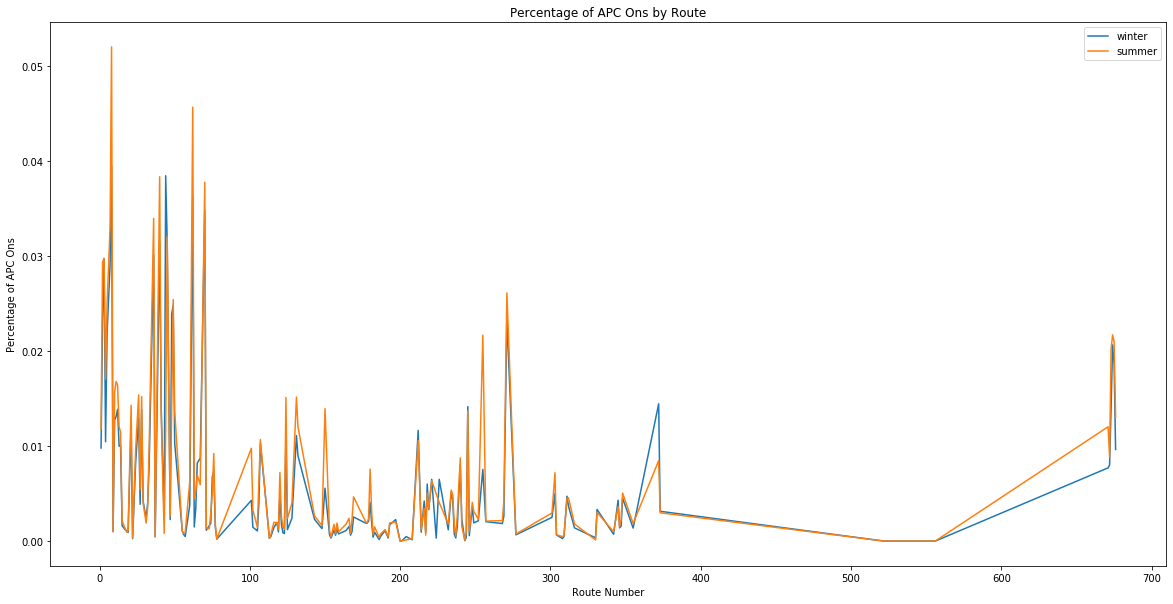

In [144]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(winter_x, winter_y, label="winter")
ax.plot(summer_x, summer_y, label="summer")
ax.legend()
plt.title("Percentage of APC Ons by Route")
plt.ylabel('Percentage of APC Ons')
plt.xlabel('Route Number')

plt.show()

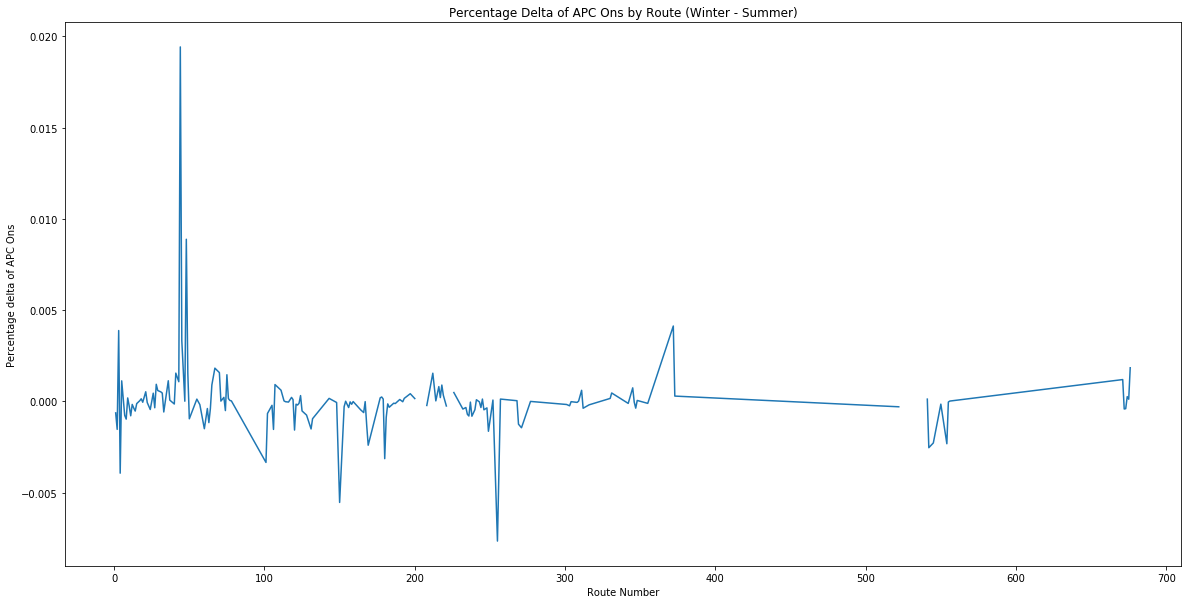

In [141]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df.rte, ((df.ons_x/w_ons) - (df.ons_y/s_ons)))

plt.title("Percentage Delta of APC Ons by Route (Winter - Summer)")
plt.ylabel('Percentage delta of APC Ons')
plt.xlabel('Route Number')

plt.show()

# Plot Orca Totals percentages by Route

In [123]:
winter_x = winter_group.rte
winter_y = winter_group.orca_total/w_orca

summer_x = summer_group.rte
summer_y = summer_group.orca_total/w_orca

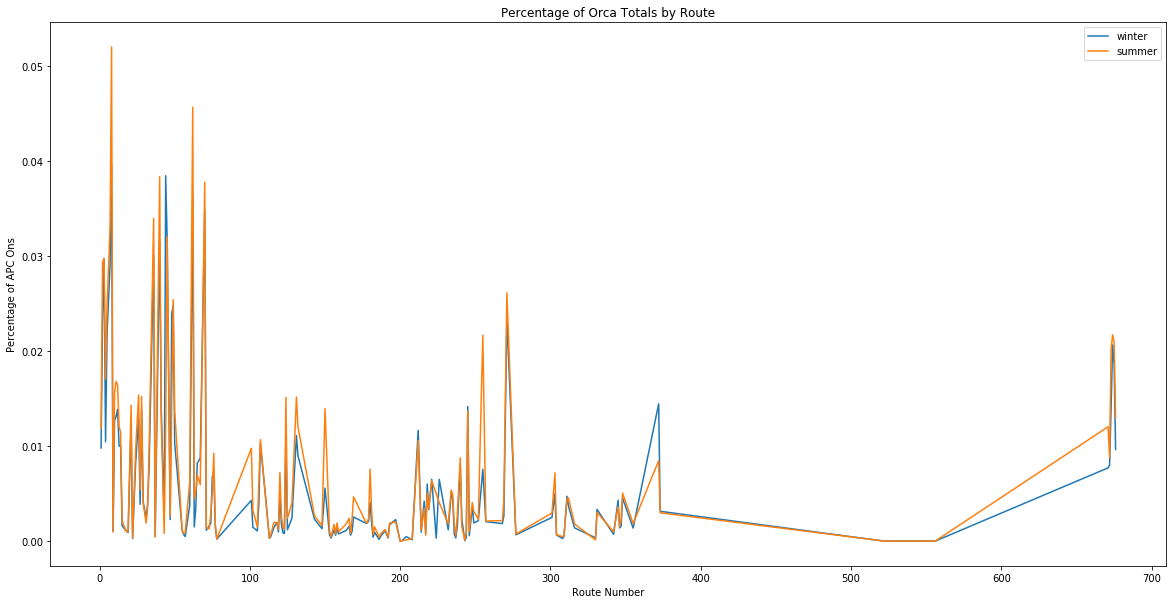

In [124]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(winter_x, winter_y, label="winter")
ax.plot(summer_x, summer_y, label="summer")
ax.legend()
plt.title("Percentage of Orca Totals by Route")
plt.ylabel('Percentage of APC Ons')
plt.xlabel('Route Number')

plt.show()

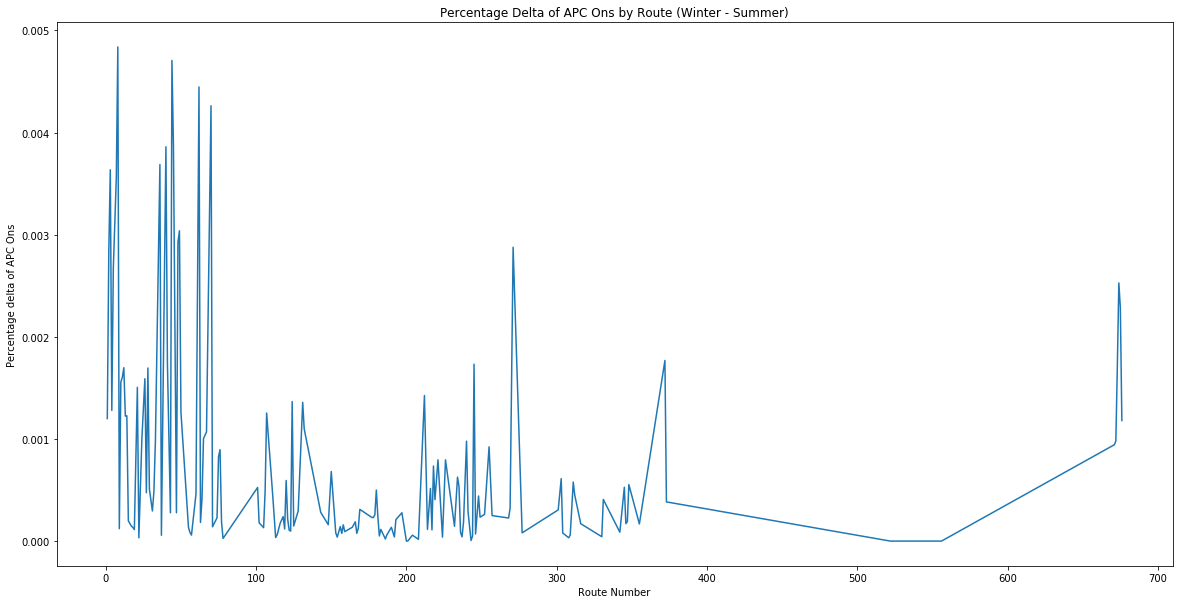

In [142]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df.rte, ((df.orca_total_x/w_orca) - (df.orca_total_x/s_orca)))

plt.title("Percentage Delta of APC Ons by Route (Winter - Summer)")
plt.ylabel('Percentage delta of APC Ons')
plt.xlabel('Route Number')

plt.show()